#  基于PaddleSeg的街景图像分割——盲人新的眼睛

# 一、项目背景介绍

   随着信息化时代的发展，涌现出了很多帮助盲人避障的智能化产品，而街景中各类复杂事物的识别则是需要解决的一大问题，通过语义图像分割的相关算法创建模型对街景各类复杂事物进行识别，可以成为盲人的另一双眼睛，有效帮助盲人避障。语义分割相关算法在汽车行业的应用大大推动了其发展，使得其应用范围得以拓展。我们可以尝试将训练完成的模型部署在相关的硬件上来实现落地应用。

# 二、数据介绍

本次项目所采用的数据集名称是“街景数据集”，来源于飞桨社区的开源数据集。

In [1]:
# 解压所挂载的数据集在同级目录下
!unzip -oq /home/aistudio/data/data93975/labelmefacade-master.zip -d work/

# 查看数据集的目录结构
!tree work/ -d

work/
└── labelmefacade-master
    ├── images
    ├── labelme-perl
    └── labels

4 directories


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [3]:
# 计算图像数据整体均值和方差、查看图片的数量
import glob
import numpy as np
import cv2

def get_mean_std(image_path_list):
    print('Total images:', len(image_path_list))
    max_val, min_val = np.zeros(3), np.ones(3) * 255
    mean, std = np.zeros(3), np.zeros(3)
    for image_path in image_path_list:
        image = cv2.imread(image_path)
        for c in range(3):
            mean[c] += image[:, :, c].mean()
            std[c] += image[:, :, c].std()
            max_val[c] = max(max_val[c], image[:, :, c].max())
            min_val[c] = min(min_val[c], image[:, :, c].min())

    mean /= len(image_path_list)
    std /= len(image_path_list)

    mean /= max_val - min_val
    std /= max_val - min_val

    return mean, std

mean, std = get_mean_std(glob.glob('work/labelmefacade-master/images/*.jpg'))
print('mean:', mean)
print('std:', std)

Total images: 945
mean: [0.45880232 0.46456693 0.46420961]
std: [0.25978572 0.24746082 0.2497982 ]


In [5]:
# 处理文本数据
# jieba进行文本数据的分词
import jieba

with open('work/labelmefacade-master/图像分割.txt', mode='r', encoding='utf-8') as f:
    text = f.read()
    seg_list = jieba.cut(text, cut_all=True)
    print("[Full Mode]" + "/ ".join(seg_list))     # 全模式

    seg_list = jieba.cut(text, cut_all=False)
    print("[Default Mode]" + "/ ".join(seg_list))  # 精确模式

    seg_list = jieba.cut_for_search(text)          # 搜索引擎模式
    print("[Search Mode]" + "/ ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.838 seconds.
Prefix dict has been built successfully.


[Full Mode]图像/ 分割/ 就是/ 把/ 图像/ 分成/ 若干/ 若干个/ 特定/ 的/ 、/ 具有/ 独特/ 独特性/ 特性/ 性质/ 的/ 区域/ 并提/ 提出/ 感兴/ 感兴趣/ 兴趣/ 目标/ 标的/ 技术/ 和/ 过程/ 。/ 它/ 是/ 由/ 图像/ 图像处理/ 处理/ 理到/ 图像/ 分析/ 的/ 关键/ 关键步骤/ 步骤/ 。/ 现有/ 的/ 图像/ 分割/ 方法/ 主要/ 分/ 以下/ 几类/ ：/ 基于/ 阈值/ 的/ 分割/ 方法/ 、/ 基于/ 区域/ 的/ 分割/ 方法/ 、/ 基于/ 边缘/ 的/ 分割/ 方法/ 以及/ 基于/ 特定/ 定理/ 理论/ 的/ 分割/ 方法/ 等/ 。/ 从/ 数学/ 角度/ 来看/ ，/ 图像/ 分割/ 是/ 将/ 数字/ 数字图像/ 图像/ 划分/ 分成/ 互不/ 相交/ 的/ 区域/ 的/ 过程/ 。/ 图像/ 分割/ 的/ 过程/ 也/ 是/ 一个/ 标记/ 记过/ 过程/ ，/ 即/ 把/ 属于/ 同一/ 区域/ 的/ 像素/ 赋予/ 相同/ 的/ 编号/ 。
[Default Mode]图像/ 分割/ 就是/ 把/ 图像/ 分成/ 若干个/ 特定/ 的/ 、/ 具有/ 独特/ 性质/ 的/ 区域/ 并/ 提出/ 感兴趣/ 目标/ 的/ 技术/ 和/ 过程/ 。/ 它/ 是/ 由/ 图像处理/ 到/ 图像/ 分析/ 的/ 关键步骤/ 。/ 现有/ 的/ 图像/ 分割/ 方法/ 主要/ 分/ 以下/ 几类/ ：/ 基于/ 阈值/ 的/ 分割/ 方法/ 、/ 基于/ 区域/ 的/ 分割/ 方法/ 、/ 基于/ 边缘/ 的/ 分割/ 方法/ 以及/ 基于/ 特定/ 理论/ 的/ 分割/ 方法/ 等/ 。/ 从/ 数学/ 角度/ 来看/ ，/ 图像/ 分割/ 是/ 将/ 数字图像/ 划分/ 成/ 互不/ 相交/ 的/ 区域/ 的/ 过程/ 。/ 图像/ 分割/ 的/ 过程/ 也/ 是/ 一个/ 标记/ 过程/ ，/ 即/ 把/ 属于/ 同一/ 区域/ 的/ 像素/ 赋予/ 相同/ 的/ 编号/ 。
[Search Mode]图像/ 分割/ 就是/ 把/ 图像/ 分成/ 若干/ 若干个/ 特定/ 的/ 、/ 具有/ 独特/ 性质/ 的/ 区域/ 并/ 提出/ 感兴/ 兴趣/ 感兴趣/ 目标/ 的/

In [6]:
# jieba词频统计
from jieba import analyse

extract_tags = analyse.extract_tags(text, withWeight=True)
for i, j in extract_tags:
    print(i, j)

分割 0.8874864795930435
图像 0.6744775667695653
基于 0.3841676135727536
方法 0.359985871742029
区域 0.33272974719594206
过程 0.26892631812869566
特定 0.1971442292295652
关键步骤 0.18136787378115943
数字图像 0.17813390926811595
阈值 0.162211992042029
像素 0.162211992042029
图像处理 0.15804268664347826
几类 0.13777142749710145
若干个 0.12984109028072463
互不 0.12396478436608696
相交 0.1209814212615942
感兴趣 0.11984733145144928
标记 0.11860362247202899
编号 0.1173267055515942
赋予 0.11043886685536232


In [7]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 366 kB 5.1 MB/s            
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


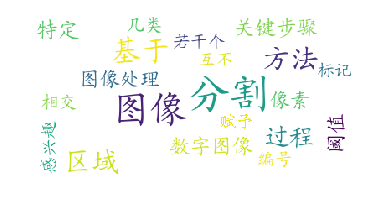

In [12]:
# 生成相关词云图
from wordcloud import WordCloud

result = {}
for word in extract_tags:
    result[word[0]] = word[1]

wordcloud = WordCloud(
    background_color="white",
    max_font_size=50,
    font_path="work/labelmefacade-master/simkai.ttf")
wordcloud.generate_from_frequencies(result)

plt.figure()
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

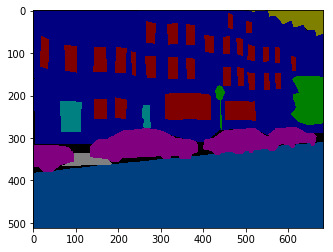

In [13]:
#随机展示数据集中的一张图像
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cv2.imread("work/labelmefacade-master/labels/boston_static_street__0407.png"))

# 三、模型介绍

本次项目主要希望训练出一个静态图模型，能对街景图像中各类事物进行分割。

In [14]:
# 下载PaddleSeg
!git clone -b release/2.2 https://gitee.com/paddlepaddle/PaddleSeg.git --depth=1

Cloning into 'PaddleSeg'...
remote: Enumerating objects: 1589, done.
remote: Counting objects: 100% (1589/1589), done.
remote: Compressing objects: 100% (1341/1341), done.
remote: Total 1589 (delta 303), reused 1102 (delta 155), pack-reused 0
Receiving objects: 100% (1589/1589), 88.50 MiB | 1.87 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Checking connectivity... done.


# 四、模型训练

#  配置yaml文件
batch_size: 2
iters: 40000

train_dataset:
  type: Dataset
  dataset_root: /home/aistudio
  train_path: /home/aistudio/work/labelmefacade-master/train.txt
  num_classes: 10
  transforms:
    - type: ResizeStepScaling
      min_scale_factor: 0.5
      max_scale_factor: 2.0
      scale_step_size: 0.25
    - type: RandomRotation
      max_rotation: 30
    - type: RandomHorizontalFlip
    - type: RandomVerticalFlip
    - type: RandomPaddingCrop
      crop_size: [512, 512]
    - type: RandomBlur
    - type: RandomDistort
      brightness_range: 0.4
      contrast_range: 0.4
      saturation_range: 0.4
    - type: Normalize
  mode: train
  
val_dataset:
  type: Dataset
  dataset_root: /home/aistudio
  val_path: /home/aistudio/labelmefacade-master/test.txt
  num_classes: 10
  transforms:
    - type: Normalize
  mode: val

optimizer:
  type: sgd
  momentum: 0.9
  weight_decay: 4.0e-5

learning_rate:
  value: 0.0025
  decay:
    type: poly
    power: 0.9
    end_lr: 0.0


_base_: '../_base_/cityscapes.yml'

batch_size: 16
iters: 160000

model:
  type: OCRNet
  backbone:
    type: HRNet_W18
  backbone_indices: [0]

optimizer:
  type: sgd

lr_scheduler:
  type: PolynomialDecay
  learning_rate: 0.01
  power: 0.9

loss_func:
  types:
    - type: MixedLoss
      losses:
        - type: CrossEntropyLoss
        - type: LovaszSoftmaxLoss
      coef: [0.8, 0.2]
    - type: MixedLoss
      losses:
        - type: CrossEntropyLoss
        - type: LovaszSoftmaxLoss
      coef: [0.8, 0.2]
  coef: [1, 0.4]

SOLVER:
    LR: 0.005
    LR_POLICY: "poly"
    OPTIMIZER: "sgd"
    NUM_EPOCHS: 40
    CROSS_ENTROPY_WEIGHT: dynamic

In [17]:
# 训练 
!python /home/aistudio/PaddleSeg/train.py \
       --config /home/aistudio/PaddleSeg/configs/ocrnet/ocrnet_cityscapes.yml \
       --do_eval \
       --use_vdl \
       --save_interval 1000 \
       --save_dir output

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
2022-02-22 11:49:20 [INFO]	
------------Environment Information-------------
platform: Linux-4.4.0-166-generic-x86_64-with-debian-stretch-sid
Python: 3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
Paddle compiled with cuda: False
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~16.04) 7.5.0
PaddlePaddle: 2.2.2
OpenCV: 4.1.1
------------------------------------------------
Traceback (most recent call last):
  File "/home/aistudio/PaddleSeg/train.py", line 190, in <module>
    main(args)
  File "/home/aistudio/PaddleSeg/train.py", line 151, in main
    train_dataset = cfg.train_dataset
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.py", line 317, in train_dataset
    return self._load_object(_train_dataset)
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.p

# 五、模型评估

In [18]:
# 评估
!python /home/aistudio/PaddleSeg/val.py \
       --config /home/aistudio/PaddleSeg/configs/ocrnet/ocrnet_cityscapes.yml \
       --model_path output/best_model/model.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
Traceback (most recent call last):
  File "/home/aistudio/PaddleSeg/val.py", line 171, in <module>
    main(args)
  File "/home/aistudio/PaddleSeg/val.py", line 143, in main
    val_dataset = cfg.val_dataset
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.py", line 324, in val_dataset
    return self._load_object(_val_dataset)
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.py", line 358, in _load_object
    return component(**params)
  File "/home/aistudio/PaddleSeg/paddleseg/datasets/dataset.py", line 114, in __init__
    '`val_path` is not found: {}'.format(val_path))
FileNotFoundError: `val_path` is not found: /home/aistudio/labelmefacade-master/test.txt


In [19]:
# 预测
!python /home/aistudio/PaddleSeg/predict.py \
       --config /home/aistudio/PaddleSeg/configs/ocrnet/ocrnet_cityscapes.yml \
       --model_path output/best_model/model.pdparams \
       --image_path work/labelmefacade-master/images/static_cambridge_street_outdoor_2006__IMG_3936.jpg\
       --save_dir output/result

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
Traceback (most recent call last):
  File "/home/aistudio/PaddleSeg/predict.py", line 200, in <module>
    main(args)
  File "/home/aistudio/PaddleSeg/predict.py", line 169, in main
    val_dataset = cfg.val_dataset
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.py", line 324, in val_dataset
    return self._load_object(_val_dataset)
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.py", line 358, in _load_object
    return component(**params)
  File "/home/aistudio/PaddleSeg/paddleseg/datasets/dataset.py", line 114, in __init__
    '`val_path` is not found: {}'.format(val_path))
FileNotFoundError: `val_path` is not found: /home/aistudio/labelmefacade-master/test.txt


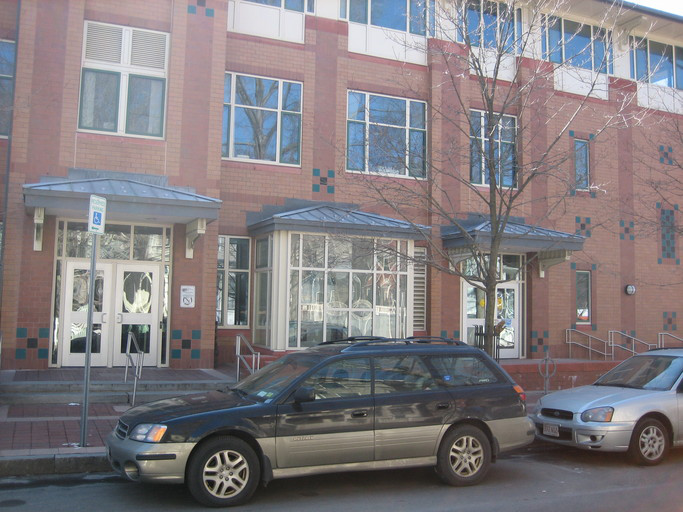

In [21]:
# 实例可视化
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('/home/aistudio/work/labelmefacade-master/images/static_cambridge_street_outdoor_2006__IMG_3936.jpg')
img

In [22]:
img = Image.open('output/result/added_prediction/static_cambridge_street_outdoor_2006__IMG_3936.jpg')
img

FileNotFoundError: [Errno 2] No such file or directory: 'output/result/added_prediction/static_cambridge_street_outdoor_2006__IMG_3936.jpg'

In [23]:
# 导出静态图模型
!python /home/aistudio/PaddleSeg/export.py \
       --config /home/aistudio/PaddleSeg/configs/ocrnet/ocrnet_cityscapes.yml \
       --model_path output/best_model/model.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
Traceback (most recent call last):
  File "/home/aistudio/PaddleSeg/export.py", line 135, in <module>
    main(args)
  File "/home/aistudio/PaddleSeg/export.py", line 93, in main
    net = cfg.model
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.py", line 275, in model
    elif hasattr(self.train_dataset, 'num_classes'):
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.py", line 317, in train_dataset
    return self._load_object(_train_dataset)
  File "/home/aistudio/PaddleSeg/paddleseg/cvlibs/config.py", line 358, in _load_object
    return component(**params)
  File "/home/aistudio/PaddleSeg/paddleseg/datasets/dataset.py", line 135, in __init__
    " image_name{}label_name\\n".format(separator))
ValueError: File list format incorrect! In tr

# 六、总结与升华

在开发帮助盲人避障的智能化产品时，街景分割是不可避免的一关，本次项目主要基于PaddleSeg来训练相应的静态图模型实现街景图像的分割,但是代码还有待改进。

理想效果如下所示：

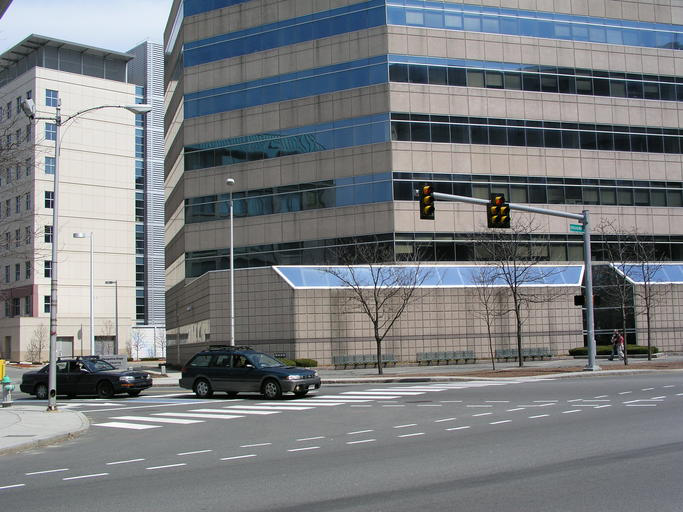

In [24]:
# 原图
img = Image.open('work/labelmefacade-master/p1.png')
img

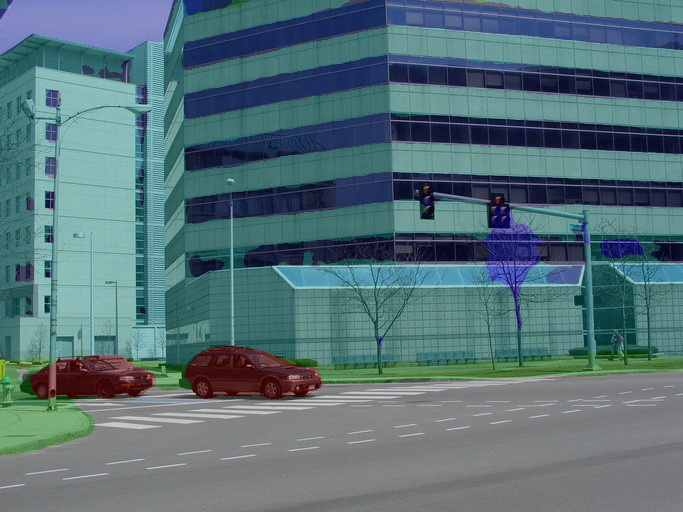

In [25]:
# 预测结果
img = Image.open('work/labelmefacade-master/p2.png')
img

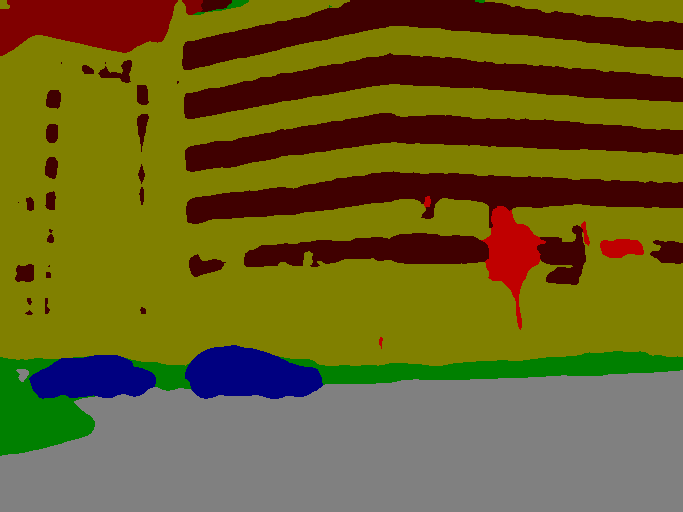

In [26]:
# 伪色彩图
img = Image.open('work/labelmefacade-master/p3.png')
img

# 七、个人总结

我的兴趣是人工智能的计算机视觉方向。
[个人AI Studio主页链接](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/974402)